___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [ ]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

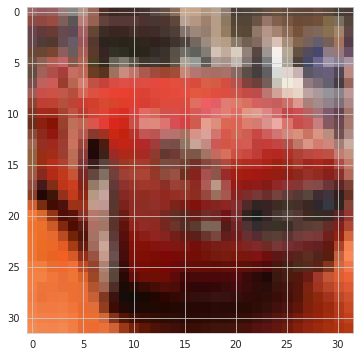

In [ ]:
plt.imshow(X_train[5])   #cmap='gray' yazinca bunu gri gösterir
# plt.matshow(X_train[5])

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

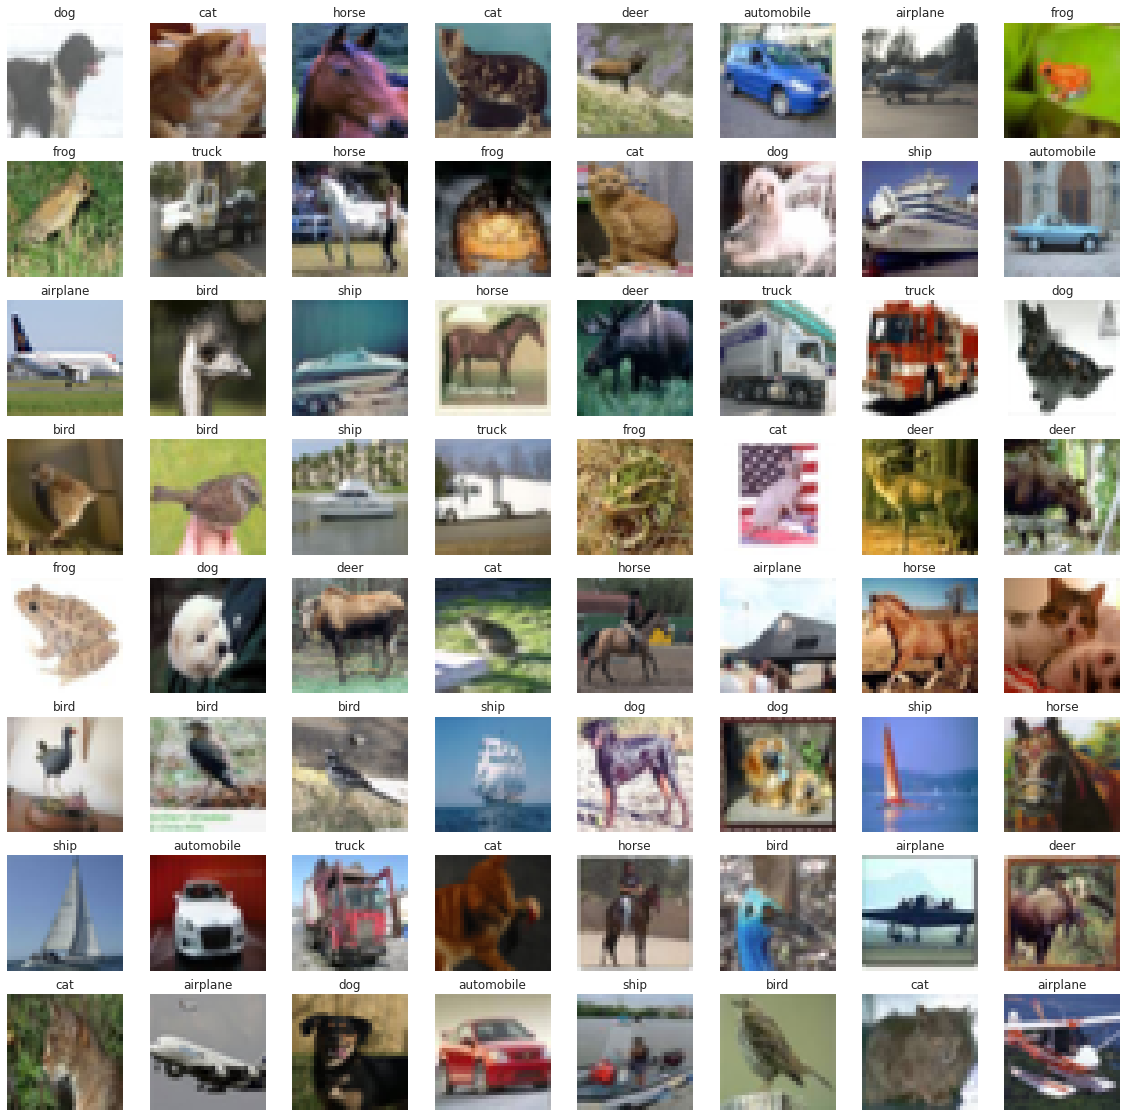

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [ ]:
X_train[5].min()

0

In [ ]:
X_train[5].max()

252

In [ ]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[5].min()

0.0

In [ ]:
X_train[5].max()

0.9882353

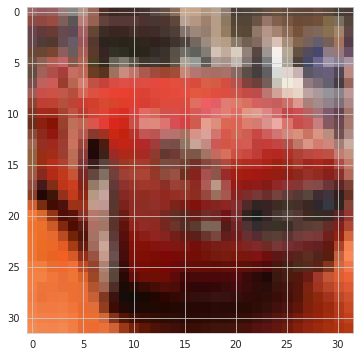

In [ ]:
plt.imshow(X_train[5])

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4174 - accuracy: 0.4884 - val_loss: 1.1494 - val_accuracy: 0.5902
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0595 - accuracy: 0.6257 - val_loss: 1.0224 - val_accuracy: 0.6402
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9215 - accuracy: 0.6757 - val_loss: 0.9322 - val_accuracy: 0.6779
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8231 - accuracy: 0.7113 - val_loss: 0.8844 - val_accuracy: 0.6959
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7413 - accuracy: 0.7398 - val_loss: 0.9197 - val_accuracy: 0.6794
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6707 - accuracy: 0.7640 - val_loss: 0.9492 - val_accuracy: 0.6773


In [ ]:
model.metrics_names  

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.417,0.488,1.149,0.590
1,1.060,0.626,1.022,0.640
2,0.921,0.676,0.932,0.678
3,0.823,0.711,0.884,0.696
4,0.741,0.740,0.920,0.679
5,0.671,0.764,0.949,0.677


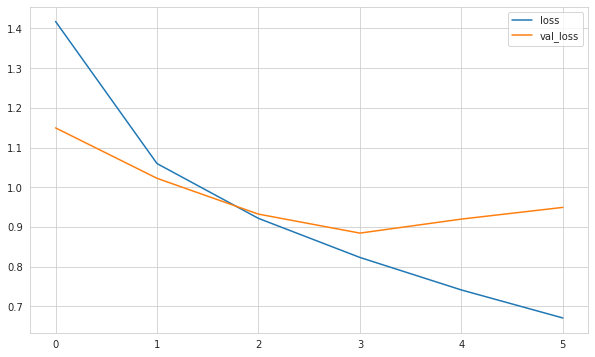

In [ ]:
summary[["loss", "val_loss"]].plot();

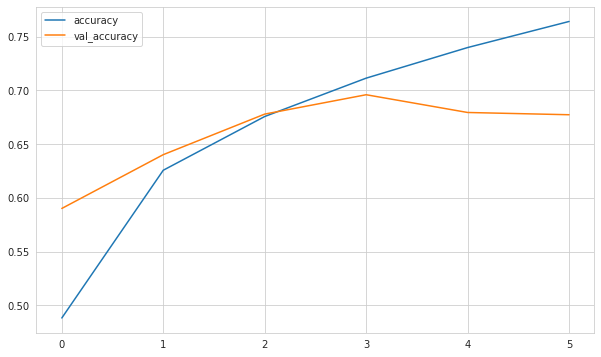

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4931 - accuracy: 0.8346


[0.493071049451828, 0.8345999717712402]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.493071049451828
Test accuracy: 0.8345999717712402


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.91      0.94      0.92      1000
           2       0.84      0.68      0.76      1000
           3       0.68      0.70      0.69      1000
           4       0.78      0.85      0.81      1000
           5       0.78      0.73      0.76      1000
           6       0.85      0.91      0.88      1000
           7       0.90      0.85      0.88      1000
           8       0.90      0.92      0.91      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[838  12  22   9   8   0   4   5  54  48]
 [  7 937   0   0   2   2   1   0   8  43]
 [ 57   0 684  40  87  43  61  12   8   8]
 [ 21   4  31 696  39 112  55  17   7  18]
 [ 11   1  22  44 854  13  20  28   6   1]
 [  4   3  22 154  35 733  14  28   2   5]
 [  2   4  10  32  29   7 909   2   3   2]
 [ 13   4  15  35  42  21   3 851   2  14]
 [ 28  22   3   5   2   3   2   0 918  17]
 [  8  41   2   2   2   1   5   1  12 926]]


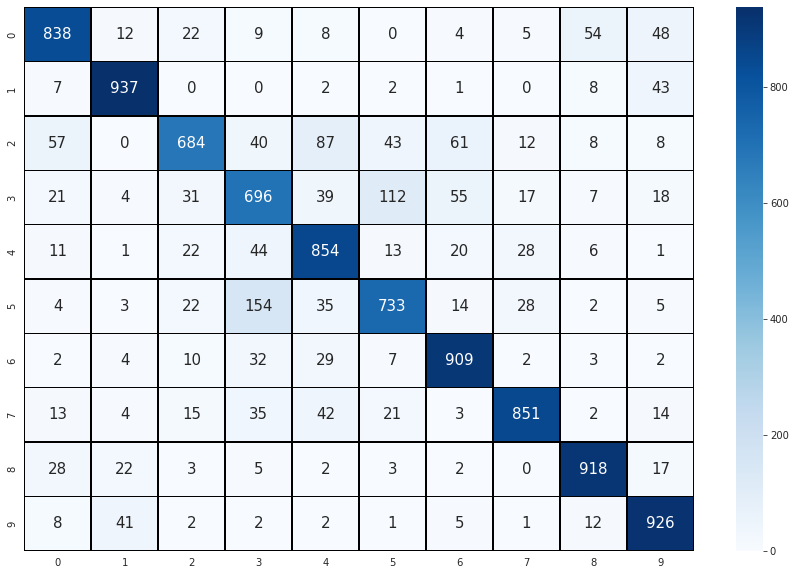

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4290 - accuracy: 0.4805 - val_loss: 1.0900 - val_accuracy: 0.6157
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0283 - accuracy: 0.6358 - val_loss: 0.9374 - val_accuracy: 0.6833
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8945 - accuracy: 0.6844 - val_loss: 0.8332 - val_accuracy: 0.7133
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8053 - accuracy: 0.7149 - val_loss: 0.7892 - val_accuracy: 0.7246
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7475 - accuracy: 0.7351 - val_loss: 0.7471 - val_accuracy: 0.7401
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6976 - accuracy: 0.7550 - val_loss: 0.7301 - val_accuracy: 0.7520
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6606 - accuracy: 0.7680 - val_loss: 0.7043 - val_accur

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.429,0.480,1.090,0.616
1,1.028,0.636,0.937,0.683
2,0.894,0.684,0.833,0.713
3,0.805,0.715,0.789,0.725
4,0.748,0.735,0.747,0.740
5,0.698,0.755,0.730,0.752
6,0.661,0.768,0.704,0.754
7,0.621,0.779,0.715,0.757
8,0.594,0.790,0.696,0.760
9,0.571,0.799,0.690,0.765


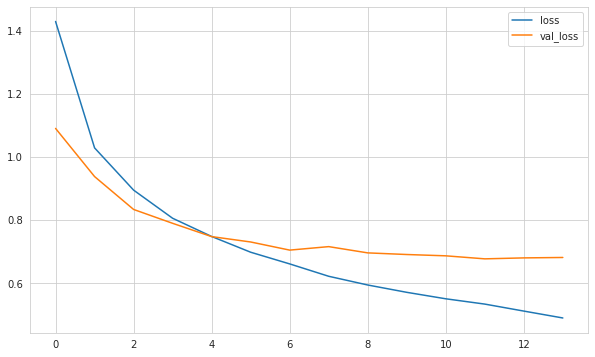

In [ ]:
summary[["loss", "val_loss"]].plot();

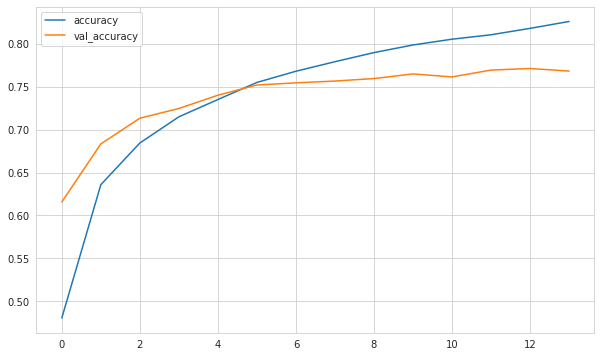

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6766 - accuracy: 0.7694


[0.6766403317451477, 0.7694000005722046]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6766403317451477
Test accuracy: 0.7694000005722046


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.83      0.91      0.87      1000
           2       0.66      0.65      0.65      1000
           3       0.68      0.52      0.59      1000
           4       0.65      0.80      0.72      1000
           5       0.68      0.71      0.69      1000
           6       0.80      0.83      0.82      1000
           7       0.85      0.81      0.83      1000
           8       0.87      0.87      0.87      1000
           9       0.88      0.79      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



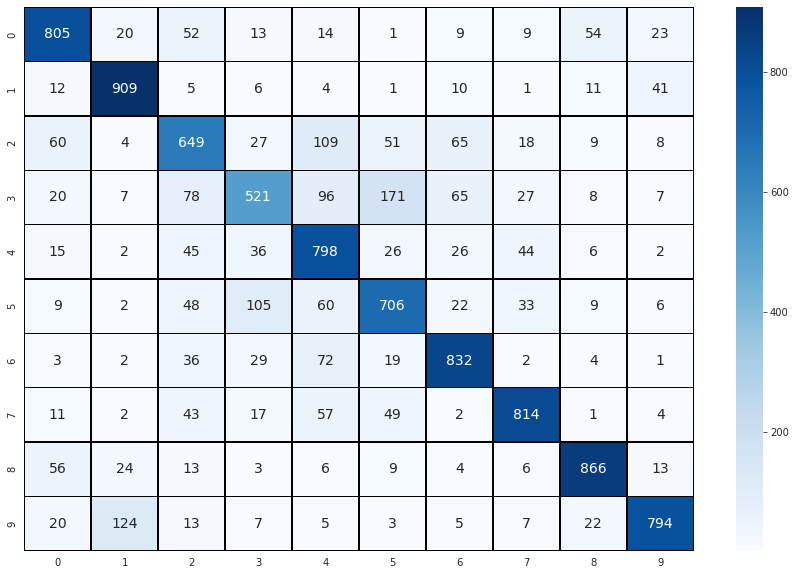

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [ ]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_50 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_51 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9533 - accuracy: 0.3030 - val_loss: 1.7030 - val_accuracy: 0.4027
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4132 - accuracy: 0.4925 - val_loss: 1.5708 - val_accuracy: 0.4758
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2159 - accuracy: 0.5767 - val_loss: 1.2857 - val_accuracy: 0.5719
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0848 - accuracy: 0.6313 - val_loss: 0.8507 - val_accuracy: 0.7029
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0037 - accuracy: 0.6650 - val_loss: 0.7659 - val_accuracy: 0.7369
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9261 - accuracy: 0.6924 - val_loss: 0.7775 - val_accuracy: 0.7342
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8747 - accuracy: 0.7138 - val_loss: 0.6938 -

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
7,0.830,0.728,0.672,0.769
8,0.797,0.743,0.657,0.776
9,0.765,0.751,0.593,0.800
10,0.729,0.767,0.843,0.721
11,0.709,0.772,0.701,0.771


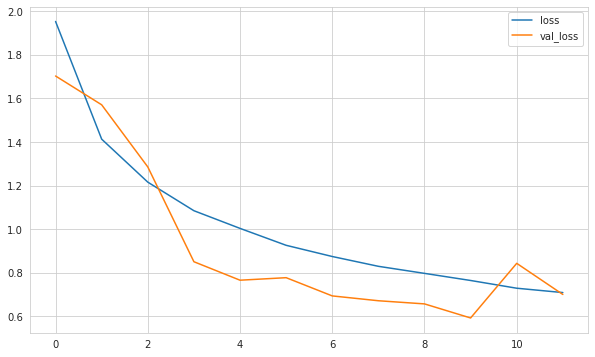

In [ ]:
summary[["loss", "val_loss"]].plot();

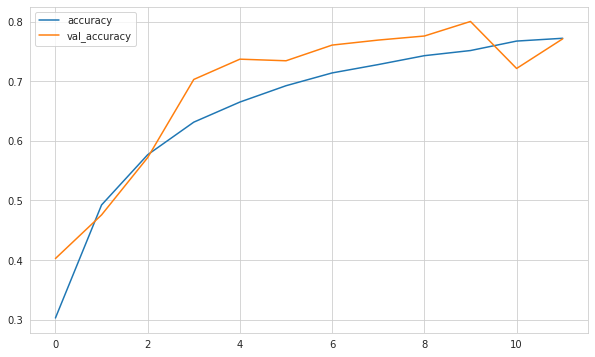

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5926 - accuracy: 0.8001


[0.5925823450088501, 0.8001000285148621]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5925823450088501
Test accuracy: 0.8001000285148621


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1000
           1       0.91      0.93      0.92      1000
           2       0.76      0.66      0.71      1000
           3       0.70      0.55      0.61      1000
           4       0.81      0.78      0.79      1000
           5       0.67      0.74      0.70      1000
           6       0.84      0.88      0.86      1000
           7       0.83      0.86      0.85      1000
           8       0.80      0.93      0.86      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



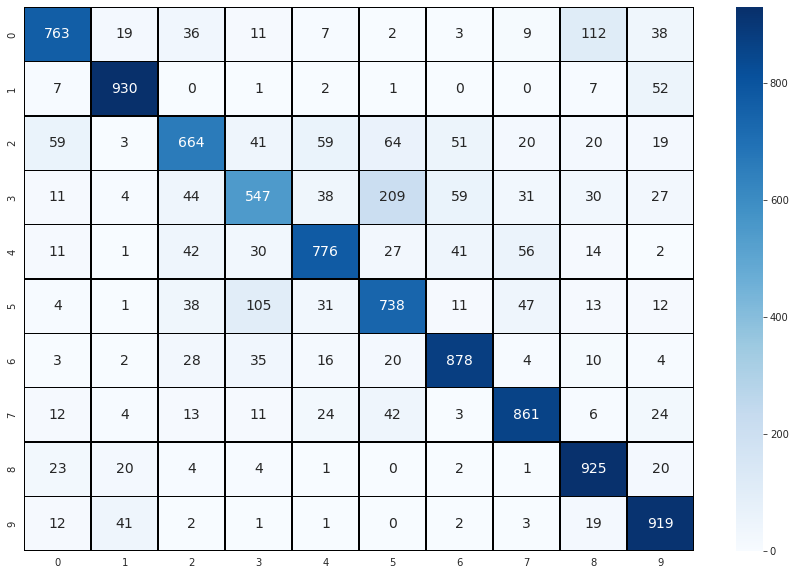

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

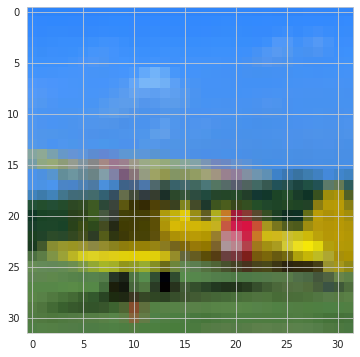

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))   

In [ ]:
image_prediction  

array([[9.8872024e-01, 7.7561033e-04, 1.8693473e-03, 2.1810182e-04,
        1.1588129e-03, 3.8849845e-05, 8.1560895e-05, 3.5131833e-04,
        4.7411676e-03, 2.0449387e-03]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
model.save("cnn-1.h5")

In [ ]:
#finished

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5') 

In [ ]:
X_test[15].shape

(32, 32, 3)

In [ ]:
np.expand_dims(X_test[15],axis=0).shape  

(1, 32, 32, 3)

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

8

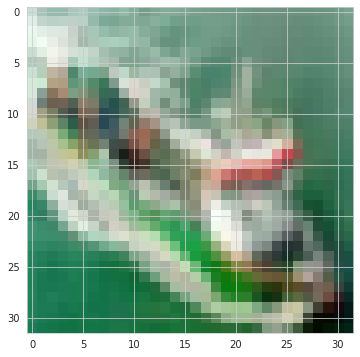

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]

'ship'